**References**:


*   Computing Platforms: Set up the Workspace for Machine Learning Projects.  https://ms.pubpub.org/pub/computing
*  Machine Learning for Predictions. https://ms.pubpub.org/pub/ml-prediction
* Machine Learning Packages: https://scikit-learn.org/stable/



# Import and Inspect Data

## import packages

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
plt.style.use('classic')
random.seed(42)

## import train and test data for Classification

In [3]:

C_train = pd.read_csv("https://raw.githubusercontent.com/Rising-Stars-by-Sunshine/stats201-tutorial-prediction/main/data/Processed_Data/Classification_Train.csv", index_col="Unnamed: 0")
C_test = pd.read_csv("https://raw.githubusercontent.com/Rising-Stars-by-Sunshine/stats201-tutorial-prediction/main/data/Processed_Data/Classification_Test.csv",index_col="Unnamed: 0")

In [4]:
C_train.isna().sum()

congested          0
theta_past_ma10    1
dtype: int64

## Drop nan for classification Data

In [5]:
C_train =C_train.dropna()

In [6]:
C_train.head()

,congested,theta_past_ma10
0,0,0.557929
1,1,0.562116
2,1,0.562060
3,1,0.597107
4,0,0.675015


In [7]:
C_test.isna().sum()

congested          0
theta_past_ma10    0
dtype: int64

## import train and test data for Regression

In [8]:

R_train = pd.read_csv("https://raw.githubusercontent.com/Rising-Stars-by-Sunshine/stats201-tutorial-prediction/main/data/Processed_Data/Regression_Train.csv", index_col="Unnamed: 0")
R_test = pd.read_csv("https://raw.githubusercontent.com/Rising-Stars-by-Sunshine/stats201-tutorial-prediction/main/data/Processed_Data/Regression_Test.csv",index_col="Unnamed: 0")

## drop nan for Regression Data

In [9]:
R_train.isna().sum()

theta              0
theta_past_ma10    1
dtype: int64

In [10]:
R_train=R_train.dropna()

In [11]:
R_test.isna().sum()

theta              0
theta_past_ma10    0
dtype: int64

In [12]:
R_train.head()

,theta,theta_past_ma10
0,0.126415,0.557929
1,0.999332,0.562116
2,0.999726,0.562060
3,0.999327,0.597107
4,0.776061,0.675015


In [13]:
R_test.head()

,theta,theta_past_ma10
42300,0.378388,0.543044
42301,0.999835,0.552995
42302,0.131837,0.627107
42303,0.117866,0.621367
42304,0.161604,0.605332


# Machine Learning Classifier

references:


*   classification report: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

*   confusion matrix: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html


*   ROC AUC: 
 * https://developers.google.com/machine-learning/crash-course/classification/check-your-understanding-roc-and-auc
 * https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
  * https://youtu.be/4jRBRDbJemM





## Define the Train and Test (X,y)


In [14]:
C_train.head()

,congested,theta_past_ma10
0,0,0.557929
1,1,0.562116
2,1,0.562060
3,1,0.597107
4,0,0.675015


In [15]:
X_train = pd.DataFrame(np.array(C_train['theta_past_ma10']).astype(float).reshape(-1,1))
y_train = pd.DataFrame(C_train['congested'].astype(int))

In [16]:
C_test.head()

,congested,theta_past_ma10
42300,0,0.543044
42301,1,0.552995
42302,0,0.627107
42303,0,0.621367
42304,0,0.605332


In [17]:
X_test = pd.DataFrame(np.array(C_test['theta_past_ma10']).astype(float).reshape(-1,1))
y_test = pd.DataFrame(C_test['congested'].astype(int))

## Import base packages

In [18]:
from sklearn.base import BaseEstimator
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve

## Decision Tree Classifer

reference:
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

### Model

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
mdl = DecisionTreeClassifier().fit(X_train, y_train)

## Result

In [21]:
y_pred= mdl.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0])

## Evaluations

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80     16837
           1       0.22      0.22      0.22      4313

    accuracy                           0.68     21150
   macro avg       0.51      0.51      0.51     21150
weighted avg       0.68      0.68      0.68     21150



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


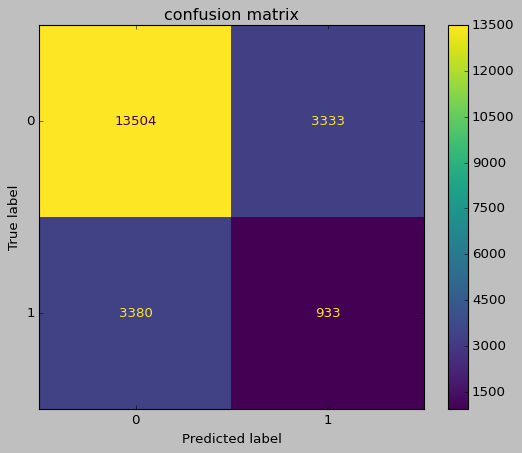

In [23]:
plot_confusion_matrix(mdl, X_test, y_test)
plt.title('confusion matrix')
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


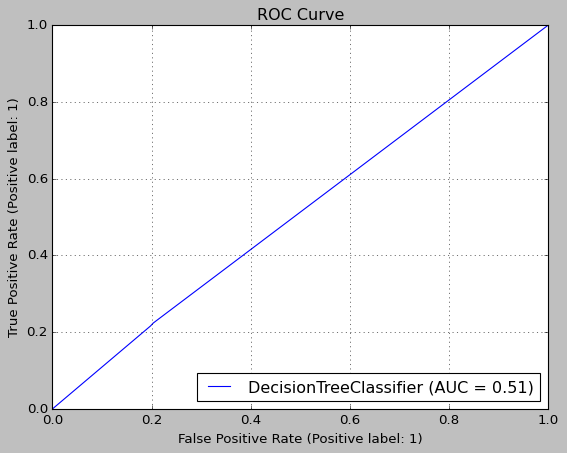

In [24]:
plot_roc_curve(mdl, X_test, y_test)
plt.grid()
plt.title('ROC Curve')
plt.show()

## Random Forest Classifier

reference:
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
mdl = RandomForestClassifier().fit(X_train, y_train)

<ipython-input-26-037da15b76a8>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  mdl = RandomForestClassifier().fit(X_train, y_train)


In [27]:
print(classification_report(y_test, mdl.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80     16837
           1       0.22      0.22      0.22      4313

    accuracy                           0.68     21150
   macro avg       0.51      0.51      0.51     21150
weighted avg       0.68      0.68      0.68     21150



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


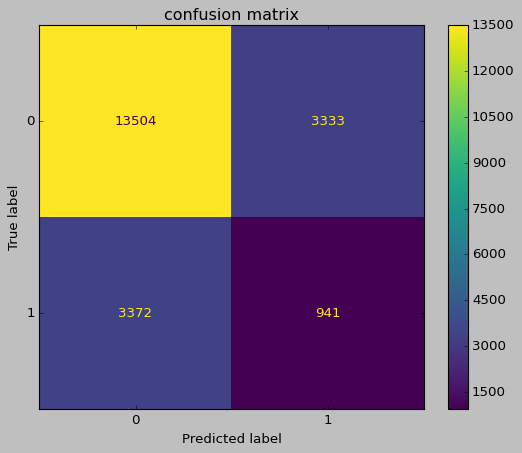

In [28]:
plot_confusion_matrix(mdl, X_test, y_test)
plt.title('confusion matrix')
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


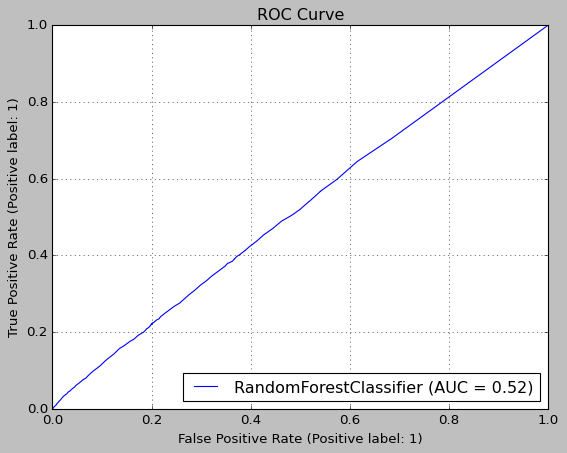

In [29]:
plot_roc_curve(mdl, X_test, y_test)
plt.grid()
plt.title('ROC Curve')
plt.show()

## Multi-Layer Classifier

reference:
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [30]:
from sklearn.neural_network import MLPClassifier

In [31]:
mdl = MLPClassifier(hidden_layer_sizes=256).fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [32]:
print(classification_report(y_test, mdl.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89     16837
           1       0.00      0.00      0.00      4313

    accuracy                           0.80     21150
   macro avg       0.40      0.50      0.44     21150
weighted avg       0.63      0.80      0.71     21150



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


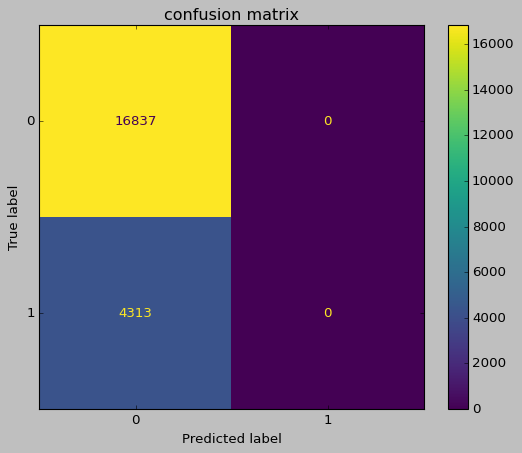

In [33]:
plot_confusion_matrix(mdl, X_test, y_test)
plt.title('confusion matrix')
plt.show()

## Auto-ML Classifier

reference:

https://auto.gluon.ai/stable/index.html

notes: 
* please first install the pacakge and restart run time 
* change runtime type to GPU can accelerate the speed
* after you restart the runtime, please mute the code box for package installation



In [79]:
!pip install autogluon

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 834 kB/s 
     |████████████████████████████████| 285 kB 75.1 MB/s 
     |████████████████████████████████| 59 kB 8.6 MB/s 
     |████████████████████████████████| 101 kB 13.2 MB/s 
     |████████████████████████████████| 279 kB 97.7 MB/s 
     |████████████████████████████████| 49 kB 7.7 MB/s 
     |████████████████████████████████| 224 kB 75.2 MB/s 
     |████████████████████████████████| 802 kB 75.6 MB/s 
     |████████████████████████████████| 41 kB 563 kB/s 
     |████████████████████████████████| 132 kB 88.2 MB/s 
     |████████████████████████████████| 1.0 MB 69.9 MB/s 
     |████████████████████████████████| 1.6 MB 72.1 MB/s 
     |████████████████████████████████| 60.2 MB 1.5 MB/s 
     |████████████████████████████████| 280 kB 95.6 MB/s 
     |████████████████████████████████| 708 kB 81.8 MB/s 
     |████████████████████████████████|

In [34]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [35]:
train_df = pd.DataFrame(X_train)
train_df['target'] = y_train.values

test_df = pd.DataFrame(X_test)
test_df['target'] = y_test.values

In [36]:
train_data = TabularDataset(train_df)
test_data = TabularDataset(test_df)

In [37]:
predictor = TabularPredictor(
    path='AutogluonModels/classifier',
    label='target'
).fit(train_data)

# predictor = TabularPredictor.load("AutogluonModels/classifier/")

Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/classifier/"
AutoGluon Version:  0.6.0
Python Version:     3.8.15
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Fri Aug 26 08:44:51 UTC 2022
Train Data Rows:    42299
Train Data Columns: 1
Label Column: target
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0, 1]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    87511.29 MB
	Train Data (Original)  Memory Usage: 0.34 MB (0.0% of available memory)
	Inferring data type of each feature bas

In [38]:
predictor = TabularPredictor.load("AutogluonModels/classifier/")

In [43]:
# reference: https://auto.gluon.ai/stable/cheatsheet.html
predictor.leaderboard(silent=True, data=test_data,extra_metrics=['accuracy','precision','recall','acc','f1'])

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined a

,model,score_test,accuracy,precision,recall,f1,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,XGBoost,0.796076,0.796076,0.000000,0.000000,0.000000,0.7880,0.026225,0.027336,0.291106,0.026225,0.027336,0.291106,1,True,11
1,LightGBMLarge,0.796076,0.796076,0.000000,0.000000,0.000000,0.7880,0.031928,0.008328,0.352516,0.031928,0.008328,0.352516,1,True,13
2,LightGBMXT,0.796076,0.796076,0.000000,0.000000,0.000000,0.7880,0.037898,0.022432,2.783037,0.037898,0.022432,2.783037,1,True,3
3,LightGBM,0.796076,0.796076,0.000000,0.000000,0.000000,0.7880,0.043327,0.008287,1.214411,0.043327,0.008287,1.214411,1,True,4
4,NeuralNetTorch,0.796076,0.796076,0.000000,0.000000,0.000000,0.7888,0.116686,0.021166,28.167133,0.116686,0.021166,28.167133,1,True,12
5,CatBoost,0.796076,0.796076,0.000000,0.000000,0.000000,0.7880,0.180149,0.005450,1.417872,0.180149,0.005450,1.417872,1,True,7
6,NeuralNetFastAI,0.796076,0.796076,0.000000,0.000000,0.000000,0.7888,0.602675,0.044296,38.905234,0.602675,0.044296,38.905234,1,True,10
7,WeightedEnsemble_L2,0.796076,0.796076,0.000000,0.000000,0.000000,0.7888,0.605023,0.048685,40.146670,0.002348,0.004388,1.241436,2,True,14
8,KNeighborsUnif,0.755934,0.755934,0.239090,0.090192,0.130976,0.7500,0.044093,0.015867,1.031586,0.044093,0.015867,1.031586,1,True,1
9,KNeighborsDist,0.713097,0.713097,0.224317,0.165546,0.190502,0.7132,0.045053,0.015202,1.020985,0.045053,0.015202,1.020985,1,True,2


# Machine Learning Regression

## important global packages

In [95]:
from sklearn.metrics import r2_score

## Define the Train and Test (X, y)

In [118]:
R_train.head()

,theta,theta_past_ma10
0,0.126415,0.557929
1,0.999332,0.562116
2,0.999726,0.562060
3,0.999327,0.597107
4,0.776061,0.675015


In [122]:
X_train = pd.DataFrame(R_train['theta_past_ma10'])
y_train = pd.DataFrame(R_train['theta'])

In [120]:
R_test.head()

,theta,theta_past_ma10
42300,0.378388,0.543044
42301,0.999835,0.552995
42302,0.131837,0.627107
42303,0.117866,0.621367
42304,0.161604,0.605332


In [123]:
X_test = pd.DataFrame(R_test['theta_past_ma10'])
y_test = pd.DataFrame(R_test['theta'])

## Linear Regression

In [124]:
from sklearn import linear_model

In [125]:
mdl = linear_model.LinearRegression().fit(X_train,y_train)

In [126]:
r2 = r2_score(y_test, mdl.predict(X_test))
print(f'R2 Score: {r2}')


R2 Score: 0.020422878994050486


In [136]:
y_pred = pd.DataFrame(np.array(mdl.predict(X_test)).astype(float),columns=['y_pred'])
y_pred

,y_pred
0,0.500459
1,0.495475
2,0.458358
3,0.461232
4,0.469263
...,...
21145,0.484866
21146,0.476818
21147,0.440692
21148,0.485655


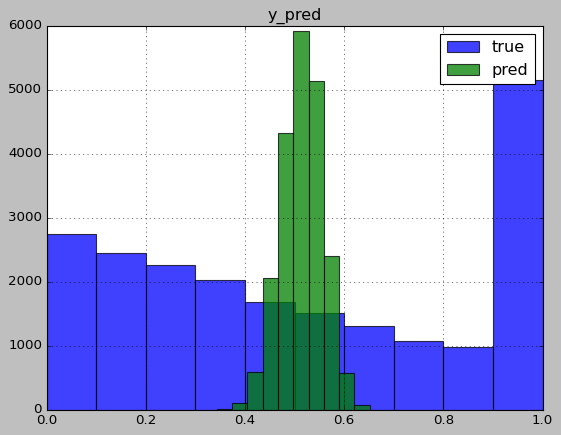

In [140]:
fig, ax = plt.subplots()

y_test.hist(ax=ax, label='true', alpha=.75)
y_pred.hist(ax=ax, label='pred', alpha=.75)

ax.legend()
fig.show()


## Random Forest Regression

In [141]:
from sklearn.ensemble import RandomForestRegressor

In [142]:
mdl = RandomForestRegressor().fit(X_train, y_train)

<ipython-input-142-d958d3892696>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  mdl = RandomForestRegressor().fit(X_train, y_train)


In [143]:
# calculate R2
from sklearn.metrics import r2_score

In [144]:
r2 = r2_score(y_test, mdl.predict(X_test))
print(f'R2 Score: {r2}')


R2 Score: -0.41998453752281106


In [145]:
y_pred = pd.DataFrame(np.array(mdl.predict(X_test)).astype(float),columns=['y_pred'])
y_pred

,y_pred
0,0.366993
1,0.122049
2,0.842188
3,0.550430
4,0.963327
...,...
21145,0.063822
21146,0.674859
21147,0.370109
21148,0.723360


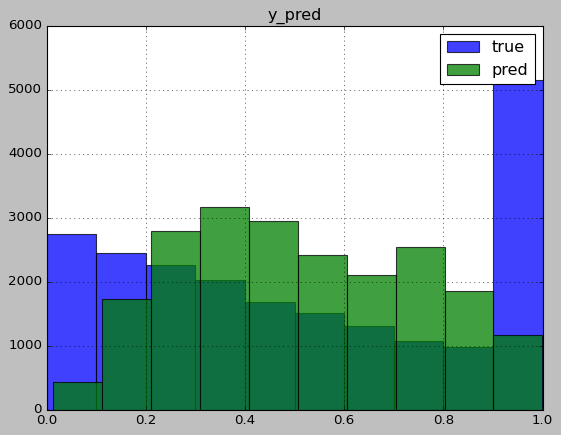

In [146]:
fig, ax = plt.subplots()

y_test.hist(ax=ax, label='true', alpha=.75)
y_pred.hist(ax=ax, label='pred', alpha=.75)

ax.legend()
fig.show()


## Auto-ML

In [147]:
train_df = pd.DataFrame(X_train)
train_df['target'] = y_train.values

test_df = pd.DataFrame(X_test)
test_df['target'] = y_test.values

In [148]:
train_data = TabularDataset(train_df)
test_data = TabularDataset(test_df)

In [149]:
predictor = TabularPredictor(
    path='AutogluonModels/regression/',
    label='target'
).fit(train_data)

Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/regression/"
AutoGluon Version:  0.6.0
Python Version:     3.8.15
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Fri Aug 26 08:44:51 UTC 2022
Train Data Rows:    42299
Train Data Columns: 1
Label Column: target
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (1.0, 0.0, 0.51469, 0.3428)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    86495.05 MB
	Train Data (Original)  Memory Usage: 0.34 MB (0.0% of available memory)
	Inferring data type of each

In [150]:
predictor = TabularPredictor.load("AutogluonModels/regression/")

In [158]:
# reference: https://auto.gluon.ai/stable/cheatsheet.html
# https://auto.gluon.ai/0.3.1/api/autogluon.tabular.models.html
predictor.leaderboard(silent=True, data=test_data, extra_metrics=["root_mean_squared_error", "mean_squared_error", "mean_absolute_error", "median_absolute_error", "r2"])

,model,score_test,root_mean_squared_error,mean_squared_error,mean_absolute_error,median_absolute_error,r2,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,NeuralNetFastAI,-0.340181,-0.340181,-0.115723,-0.300494,-0.320490,0.020929,-0.341453,0.290702,0.033644,33.444631,0.290702,0.033644,33.444631,1,True,8
1,WeightedEnsemble_L2,-0.340198,-0.340198,-0.115735,-0.300501,-0.320984,0.020831,-0.341315,0.415481,0.042911,34.748350,0.007696,0.000592,0.410700,2,True,12
2,LightGBMXT,-0.340283,-0.340283,-0.115792,-0.300551,-0.321487,0.020344,-0.341566,0.082683,0.006064,0.360479,0.082683,0.006064,0.360479,1,True,3
3,CatBoost,-0.340327,-0.340327,-0.115822,-0.300545,-0.320985,0.020090,-0.341484,0.034400,0.002611,0.532541,0.034400,0.002611,0.532541,1,True,6
4,XGBoost,-0.340629,-0.340629,-0.116028,-0.300926,-0.321108,0.018346,-0.342054,0.028079,0.004637,0.165756,0.028079,0.004637,0.165756,1,True,9
5,LightGBM,-0.340651,-0.340651,-0.116043,-0.301211,-0.321952,0.018224,-0.341877,0.040947,0.003060,0.253058,0.040947,0.003060,0.253058,1,True,4
6,LightGBMLarge,-0.341033,-0.341033,-0.116304,-0.301599,-0.322972,0.016018,-0.342429,0.038458,0.003682,0.491704,0.038458,0.003682,0.491704,1,True,11
7,NeuralNetTorch,-0.342560,-0.342560,-0.117347,-0.298033,-0.302057,0.007187,-0.344191,0.116345,0.017664,67.390199,0.116345,0.017664,67.390199,1,True,10
8,ExtraTreesMSE,-0.363829,-0.363829,-0.132372,-0.312435,-0.302436,-0.119925,-0.366938,0.553349,0.098169,1.194080,0.553349,0.098169,1.194080,1,True,7
9,KNeighborsUnif,-0.373725,-0.373725,-0.139670,-0.319159,-0.307711,-0.181674,-0.375057,0.047471,0.010856,0.018385,0.047471,0.010856,0.018385,1,True,1


In [159]:
r2 = r2_score(y_test,
              predictor.predict(
                  X_test)
              )
print(f'R2 Score: {r2}')

R2 Score: 0.020830611584158443


In [168]:
y_pred = predictor.predict(X_test)
y_pred

42300    0.489088
42301    0.485113
42302    0.457217
42303    0.458740
42304    0.464327
           ...   
63445    0.478124
63446    0.471641
63447    0.448619
63448    0.478333
63449    0.484838
Name: target, Length: 21150, dtype: float32

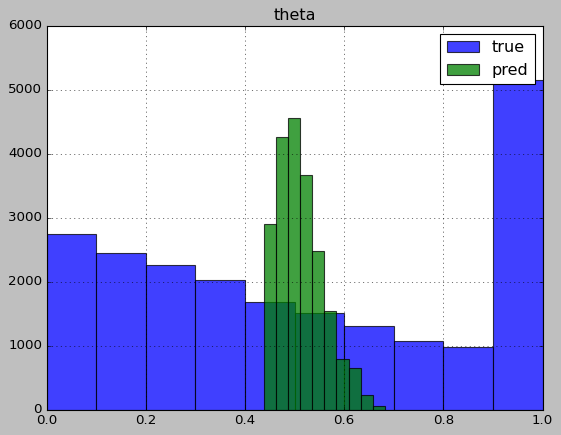

In [169]:
fig, ax = plt.subplots()

y_test.hist(ax=ax, label='true', alpha=.75)
y_pred.hist(ax=ax, label='pred', alpha=.75)

ax.legend()
fig.show()
